This is a notebook for the study of Zeeman's heartbeat model

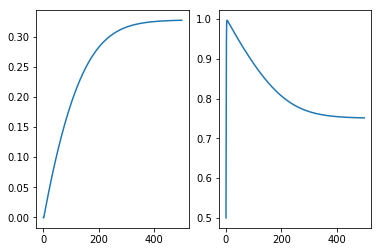

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
T = 100000
h = 0.005
# Model parameters
y0 = 1.3/np.sqrt(3.0)
epsilon = 0.01
# Maps
f = lambda x, y: epsilon*(y - y0)
g = lambda x, y: -(y**3 - y + x)

# Numerical solution (euler)
x = np.zeros(T)
y = np.zeros(T)
t = np.zeros(T)
# Initial conditions
x[0] = 0.0
y[0] = 0.5

for i in range(T-1):
    x[i+1] = x[i] + h*f(x[i], y[i])
    y[i+1] = y[i] + h*g(x[i], y[i])
    t[i+1] = t[i] + h
    
# Plotting
fig, ax = plt.subplots(1, 2)
ax[0].plot(t, x)
ax[1].plot(t, y)
plt.show()

Critical manifold:

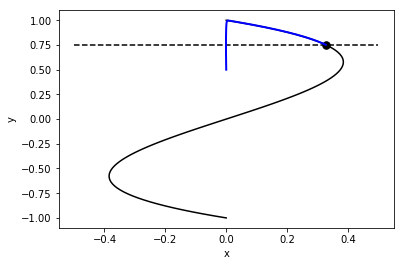

In [45]:
F = lambda y: -y**3 + y
 
yy = np.linspace(-1, 1, 100)

plt.plot(F(yy), yy, 'k')
plt.plot(y0 - y0**3, y0, 'k.', markersize = 15)
plt.plot([-0.5, 0.5], [y0, y0], 'k--')
plt.plot(x, y, 'b', linewidth = 2.0)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Desingularization

0.5773502691896258


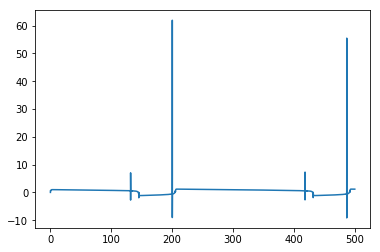

In [42]:
fp = lambda y: (y - y0)/(1.0 - 3.0*y**2)

yp = np.zeros(T)
t = np.zeros(T)

for i in range(T-1):
    if np.abs(yp[i] - 1.0/np.sqrt(3)) < 5.0*h:
        yp[i+1] = 1.0/np.sqrt(3) + 5.0*h
        
    elif np.abs(yp[i] + 1.0/np.sqrt(3)) < 5.0*h:
        yp[i+1] = -1.0/np.sqrt(3) + 5.0*h
    else:
        yp[i+1] = y[i] + h*fp(y[i])
    t[i+1] = t[i] + h
    
print 1.0/np.sqrt(3.0)
    
    
plt.plot(t, yp)
plt.show()